In [9]:
results_dir = 'results-alpha'

In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_results_list = []
#list files in directory:

for file in os.listdir(results_dir):
    df_loc = pd.read_csv(os.path.join(results_dir, file))
    df_results_list.append(df_loc)
big_perf_df = pd.concat(df_results_list)

n_samples_of_plot = 10000
big_perf_df = big_perf_df[big_perf_df['n_samples'] == n_samples_of_plot]


algos = big_perf_df['algo'].unique()
structures = big_perf_df['structure'].unique()

print(algos)
print(structures)

['ICSCM' 'ICP+DT' 'ICSCMnopruning']
['conjunction2' 'tree3' 'conjunction4' 'conjunction1' 'conjunction3'
 'tree4' 'tree5']


ICSCM 1 0.5 100
ICSCM 1 0.05 100
ICSCM 1 0.2 100
ICSCM 1 0.75 100
ICSCM 1 0.1 100
ICSCM 1 1.0 100
ICSCM 1 0.01 100
ICSCM 1 0.025 100
ICSCM 1 0.005 100
ICSCM 1 0.002 100
ICSCM 1 0.001 100
ICSCM 2 0.75 100
ICSCM 2 0.5 100
ICSCM 2 0.05 100
ICSCM 2 0.1 100
ICSCM 2 0.2 100
ICSCM 2 1.0 100
ICSCM 2 0.01 100
ICSCM 2 0.025 100
ICSCM 2 0.005 100
ICSCM 2 0.002 100
ICSCM 2 0.001 100
ICSCM 3 0.05 100
ICSCM 3 1.0 100
ICSCM 3 0.2 100
ICSCM 3 0.75 100
ICSCM 3 0.5 100
ICSCM 3 0.1 100
ICSCM 3 0.01 100
ICSCM 3 0.025 100
ICSCM 3 0.005 100
ICSCM 3 0.002 100
ICSCM 3 0.001 100
ICSCM 4 0.05 100
ICSCM 4 1.0 100
ICSCM 4 0.1 100
ICSCM 4 0.2 100
ICSCM 4 0.75 100
ICSCM 4 0.5 100
ICSCM 4 0.01 100
ICSCM 4 0.025 100
ICSCM 4 0.005 100
ICSCM 4 0.002 100
ICSCM 4 0.001 100
ICSCM 5 0.75 100
ICSCM 5 1.0 100
ICSCM 5 0.2 100
ICSCM 5 0.1 100
ICSCM 5 0.05 100
ICSCM 5 0.5 100
ICSCM 5 0.01 100
ICSCM 5 0.025 100
ICSCM 5 0.005 100
ICSCM 5 0.002 100
ICSCM 5 0.001 100
ICSCM 6 0.2 100
ICSCM 6 0.75 100
ICSCM 6 0.1 100
ICSCM 6 0.5 100


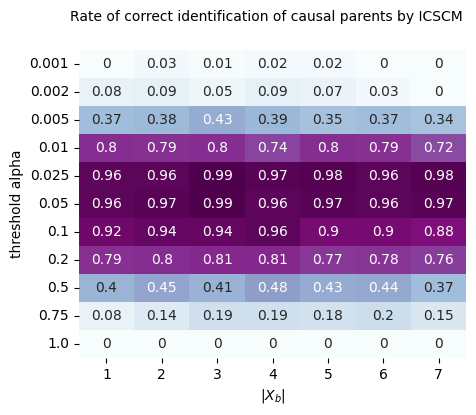

In [11]:
structures_to_keep = [
                  'conjunction2', 
                  ]
big_perf_df = big_perf_df[big_perf_df['structure'].isin(structures_to_keep)]

algos_to_keep = []
algos_to_keep.append('ICSCM')

big_perf_df = big_perf_df[big_perf_df['algo'].isin(algos_to_keep)]


perf_df_causalscore = big_perf_df[big_perf_df['type'] == 'causal']

min_n_splits = 1000
for a in set(perf_df_causalscore['algo']):
    perf_df_causalscore_a = perf_df_causalscore[perf_df_causalscore['algo'] == a]
    for n in set(perf_df_causalscore['n_var']):
        perf_df_causalscore_a_n = perf_df_causalscore_a[perf_df_causalscore_a['n_var'] == n]
        for alpha in set(perf_df_causalscore_a_n['alpha_threshold']):
            perf_df_causalscore_a_n_alpha = perf_df_causalscore_a_n[perf_df_causalscore_a_n['alpha_threshold'] == alpha]
            print(a, n, alpha, len(perf_df_causalscore_a_n_alpha))
            assert len(perf_df_causalscore_a_n_alpha) == 100
            splits = set(perf_df_causalscore_a_n['split'])
            #print(a, n, len(perf_df_causalscore_a_n_alpha))
            if 0 < len(splits) < min_n_splits:
                min_n_splits = len(splits)
print("min_n_splits", min_n_splits)
perf_df_causalscore = perf_df_causalscore[perf_df_causalscore['split'].isin(list(range(min_n_splits)))]

fig, axis = plt.subplots(len(structures_to_keep), len(algos_to_keep), figsize=(5*len(algos_to_keep), 4*len(structures_to_keep)))

ax0_id = 0
ax1_id = 0
for algo in algos_to_keep:
    for structure in structures_to_keep:
        print(algo, structure, ax0_id, ax1_id)
        loc_df = perf_df_causalscore[(perf_df_causalscore['algo'] == algo) & (perf_df_causalscore['structure'] == structure)].copy()
        perf_df_causalscore_small = loc_df[['alpha_threshold', 'score', 'split', 'n_var']]
        heatmap_df = perf_df_causalscore_small.groupby(['alpha_threshold', 'n_var']).mean().reset_index().pivot(index='alpha_threshold', columns='n_var', values='score')
        if len(algos_to_keep) > 1:
            sns.heatmap(heatmap_df, annot=True, cmap='BuPu', ax=axis[ax1_id], cbar=False, vmin=0, vmax=1)
            axis[ax1_id].set_title(f'{algo.split("+")[0]} - {structure}', fontsize=10)
            axis[ax1_id].set_xlabel('$|X_b|$')
            axis[ax1_id].set_ylabel('threshold alpha')
        else:
            sns.heatmap(heatmap_df, annot=True, cmap='BuPu', cbar=False, vmin=0, vmax=1)
            fig.suptitle(f'Rate of correct identification of causal parents by {algo}', fontsize=10)
            axis.set_xlabel('$|X_b|$')
            axis.set_ylabel('threshold alpha')

        ax0_id += 1
    ax1_id += 1
    ax0_id = 0

plt.show()

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision, recall, f1 = [], [], []
for code, card_Xb, structure in zip(list(perf_df_causalscore['idx_features_used_binary_code']), list(perf_df_causalscore['n_var']), list(perf_df_causalscore['structure'])):
    card_Xb = int(card_Xb)
    card_Xc = 1
    card_E = 1
    card_Xa = int(structure[-1])    
    #features_names = ['E'] + [f'Xb{i}' for i in range(1, card_Xb + 1)] + [f'Xa{i}' for i in range(1, card_Xa + 1)] + ['Xc']
    true_causal_features = [0]*card_E + [0]*card_Xb + [1]*card_Xa + [0]*card_Xc
    number_of_variables = len(true_causal_features)
    #print(bin(code))
    #print(bin(code)[2:].zfill(n_var))
    bin_rep = bin(code)[2:].zfill(number_of_variables)
    used_features = [int(i) for i in bin_rep]
    used_features.reverse()
    precision.append(precision_score(true_causal_features, used_features))
    recall.append(recall_score(true_causal_features, used_features))
    f1.append(f1_score(true_causal_features, used_features))
perf_df_causalscore['precision'] = precision
perf_df_causalscore['recall'] = recall
perf_df_causalscore['f1'] = f1

/home/thibaud/Documents/PROJETS/icscm/env-icscm-reproduce/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thibaud/Documents/PROJETS/icscm/env-icscm-reproduce/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thibaud/Documents/PROJETS/icscm/env-icscm-reproduce/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [13]:
df = perf_df_causalscore.copy()
df = df[df['alpha_threshold'] == 0.001]
df = df[df['n_var'] == 2]

for code, card_Xb, structure in zip(list(df['idx_features_used_binary_code']), list(df['n_var']), list(df['structure'])):
    card_Xb = int(card_Xb)
    card_Xc = 1
    card_E = 1
    card_Xa = int(structure[-1])    
    #features_names = ['E'] + [f'Xb{i}' for i in range(1, card_Xb + 1)] + [f'Xa{i}' for i in range(1, card_Xa + 1)] + ['Xc']
    true_causal_features = [0]*card_E + [0]*card_Xb + [1]*card_Xa + [0]*card_Xc
    number_of_variables = len(true_causal_features)
    #print(bin(code))
    #print(bin(code)[2:].zfill(n_var))
    bin_rep = bin(code)[2:].zfill(number_of_variables)
    used_features = [int(i) for i in bin_rep]
    print(used_features)
    print(true_causal_features)
    print('----------------')
    used_features.reverse()
    precision.append(precision_score(true_causal_features, used_features))
    recall.append(recall_score(true_causal_features, used_features))
    f1.append(f1_score(true_causal_features, used_features))

[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 0]
----------------
[1, 0, 1, 

In [14]:
perf_df_causalscore

,algo,score,metric,type,split,n_var,n_samples,idx_features_used_binary_code,structure,alpha_threshold,precision,recall,f1
2,ICSCM,1.0,01 loss,causal,25,7,10000,768,conjunction2,0.200,1.0,1.0,1.000000
2,ICSCM,1.0,01 loss,causal,13,1,10000,12,conjunction2,0.005,1.0,1.0,1.000000
2,ICSCM,0.0,01 loss,causal,10,3,10000,0,conjunction2,1.000,0.0,0.0,0.000000
2,ICSCM,0.0,01 loss,causal,58,2,10000,40,conjunction2,0.001,0.5,0.5,0.500000
2,ICSCM,0.0,01 loss,causal,3,1,10000,20,conjunction2,0.005,0.5,0.5,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,ICSCM,0.0,01 loss,causal,54,7,10000,0,conjunction2,1.000,0.0,0.0,0.000000
2,ICSCM,0.0,01 loss,causal,61,6,10000,128,conjunction2,0.500,1.0,0.5,0.666667
2,ICSCM,0.0,01 loss,causal,14,2,10000,8,conjunction2,0.750,1.0,0.5,0.666667
2,ICSCM,1.0,01 loss,causal,42,7,10000,768,conjunction2,0.100,1.0,1.0,1.000000


In [15]:
perf_df_causalscore

,algo,score,metric,type,split,n_var,n_samples,idx_features_used_binary_code,structure,alpha_threshold,precision,recall,f1
2,ICSCM,1.0,01 loss,causal,25,7,10000,768,conjunction2,0.200,1.0,1.0,1.000000
2,ICSCM,1.0,01 loss,causal,13,1,10000,12,conjunction2,0.005,1.0,1.0,1.000000
2,ICSCM,0.0,01 loss,causal,10,3,10000,0,conjunction2,1.000,0.0,0.0,0.000000
2,ICSCM,0.0,01 loss,causal,58,2,10000,40,conjunction2,0.001,0.5,0.5,0.500000
2,ICSCM,0.0,01 loss,causal,3,1,10000,20,conjunction2,0.005,0.5,0.5,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,ICSCM,0.0,01 loss,causal,54,7,10000,0,conjunction2,1.000,0.0,0.0,0.000000
2,ICSCM,0.0,01 loss,causal,61,6,10000,128,conjunction2,0.500,1.0,0.5,0.666667
2,ICSCM,0.0,01 loss,causal,14,2,10000,8,conjunction2,0.750,1.0,0.5,0.666667
2,ICSCM,1.0,01 loss,causal,42,7,10000,768,conjunction2,0.100,1.0,1.0,1.000000


ICSCM conjunction2 0 0


/tmp/ipykernel_15409/2143291000.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


ICSCM conjunction2 0 0
ICSCM conjunction2 0 0


/tmp/ipykernel_15409/2143291000.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_15409/2143291000.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


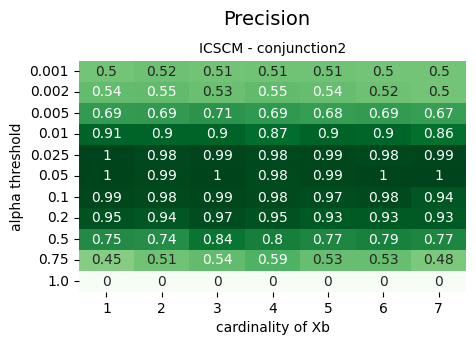

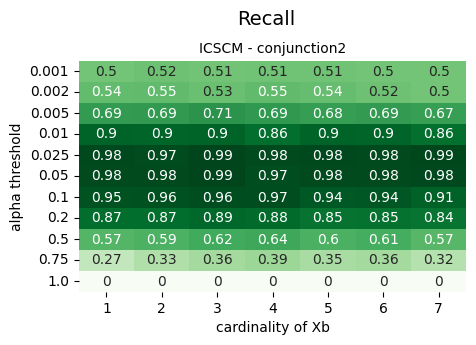

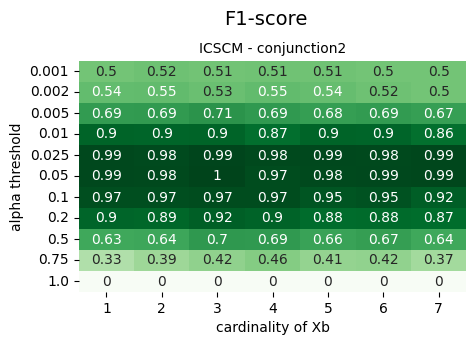

In [16]:
fig, axis = plt.subplots(len(structures_to_keep), len(algos_to_keep), figsize=(5*len(algos_to_keep), 3*len(structures_to_keep)))
ax1_id = 0
for algo in algos_to_keep:
    for structure in structures_to_keep:
        print(algo, structure, ax0_id, ax1_id)
        loc_df = perf_df_causalscore[(perf_df_causalscore['algo'] == algo) & (perf_df_causalscore['structure'] == structure)].copy()
        perf_df_causalscore_small = loc_df[['alpha_threshold', 'precision', 'split', 'n_var']]
        heatmap_df = perf_df_causalscore_small.groupby(['alpha_threshold', 'n_var']).mean().reset_index().pivot(index='alpha_threshold', columns='n_var', values='precision')
        sns.heatmap(heatmap_df, annot=True, cmap='Greens', ax=axis, cbar=False, vmin=0, vmax=1)
        axis.set_title(f'{algo.split("+")[0]} - {structure}', fontsize=10)
        axis.set_xlabel('cardinality of Xb')
        axis.set_ylabel('alpha threshold')
    ax1_id += 1
fig.suptitle('Precision', fontsize=14, y=1.05)
fig.show()

fig, axis = plt.subplots(len(structures_to_keep), len(algos_to_keep), figsize=(5*len(algos_to_keep), 3*len(structures_to_keep)))
ax1_id = 0
for algo in algos_to_keep:
    for structure in structures_to_keep:
        print(algo, structure, ax0_id, ax1_id)
        loc_df = perf_df_causalscore[(perf_df_causalscore['algo'] == algo) & (perf_df_causalscore['structure'] == structure)].copy()
        perf_df_causalscore_small = loc_df[['alpha_threshold', 'recall', 'split', 'n_var']]
        heatmap_df = perf_df_causalscore_small.groupby(['alpha_threshold', 'n_var']).mean().reset_index().pivot(index='alpha_threshold', columns='n_var', values='recall')
        sns.heatmap(heatmap_df, annot=True, cmap='Greens', ax=axis, cbar=False, vmin=0, vmax=1)
        axis.set_title(f'{algo.split("+")[0]} - {structure}', fontsize=10)
        axis.set_xlabel('cardinality of Xb')
        axis.set_ylabel('alpha threshold')
    ax1_id += 1
fig.suptitle('Recall', fontsize=14, y=1.05)
fig.show()

fig, axis = plt.subplots(len(structures_to_keep), len(algos_to_keep), figsize=(5*len(algos_to_keep), 3*len(structures_to_keep)))
ax1_id = 0
for algo in algos_to_keep:
    for structure in structures_to_keep:
        print(algo, structure, ax0_id, ax1_id)
        loc_df = perf_df_causalscore[(perf_df_causalscore['algo'] == algo) & (perf_df_causalscore['structure'] == structure)].copy()
        perf_df_causalscore_small = loc_df[['alpha_threshold', 'f1', 'split', 'n_var']]
        heatmap_df = perf_df_causalscore_small.groupby(['alpha_threshold', 'n_var']).mean().reset_index().pivot(index='alpha_threshold', columns='n_var', values='f1')
        sns.heatmap(heatmap_df, annot=True, cmap='Greens', ax=axis, cbar=False, vmin=0, vmax=1)
        axis.set_title(f'{algo.split("+")[0]} - {structure}', fontsize=10)
        axis.set_xlabel('cardinality of Xb')
        axis.set_ylabel('alpha threshold')
    ax1_id += 1
fig.suptitle('F1-score', fontsize=14, y=1.05)
fig.show()